<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 10 - Due April 23, Tuesday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Non-Coding Assignments:

**1. (10 Points) Given that X ∼ Unif(0; 1). Let
Y = logit(X) ≡ log 1 −XX 
Find the probability density function (PDF) of Y**

assuming that:

\begin{equation}
 f(x) =
    \begin{cases}
      1 & \text{0$\leq$x$\leq$1}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

\begin{equation}
 g(x) = \log\left({\frac{x}{1-x}} \right)
\end{equation}

then the inverse of g function can be writen as:

\begin{equation}
e^y = \frac{x}{1-x} \rightarrow x = e^y - xe^y \rightarrow e^y = x(1+e^y) \rightarrow x = \frac{e^y}{1+e^y}
\end{equation}

where 0$\leq$x$\leq$1 and therefore

\begin{equation}
f(g^{-1}(y)) = 1
\end{equation}

now we can compute the jacobian:

\begin{equation}
f_Y(y) = f(g^{-1}(y)) \left|\frac{dg^{-1}(y)}{dy} \right|
\end{equation}

\begin{equation}
\frac{dg^{-1}(y)}{dy} = \frac{e^y(1+e^y)-(e^y)^2}{(1+e^y)^2} = \frac{e^y(1+e^y-e^y)}{(1+e^y)^2} = \frac{e^y}{(1+e^y)^2}
\end{equation}

so,

\begin{equation}
f_Y(y) = \frac{e^y}{(1+e^y)^2}
\end{equation}

## Coding Assignments:

In [61]:
import numpy as np
import seaborn as sb
import sympy as sym
from sympy import *
from numpy import ma
from numpy.linalg import inv
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
from scipy.stats import norm, uniform, lognorm, gamma, poisson, beta, binom, chi2, dgamma
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from scipy import stats
from scipy import integrate
import random 
import warnings

np.random.seed(100)

**3. (20 Points) Problem 7.1 on page 230 of Computational Statistics.**

The goal of this problem is to investigate the role of the proposal distribution in a
Metropolis–Hastings algorithm designed to simulate from the posterior distribution of
a parameter δ. In part (a), you are asked to simulate data from a distribution with δ
known. For parts (b)–(d), assume δ is unknown with a Unif(0,1) prior distribution for
δ. For parts (b)–(d), provide an appropriate plot and a table summarizing the output of
the algorithm. To facilitate comparisons, use the same number of iterations, random
seed, starting values, and burn-in period for all implementations of the algorithm

**(a) Simulate 200 realizations from the mixture distribution in Equation (7.6) with δ =
0.7. Draw a histogram of these data.**

In [2]:
def Data_Generator(Num):
    #Sample n random uniforms U
    U = uniform.rvs(0, 1, size=200)
    rand_samples = np.zeros(200)
    #Sampling from the mixture
    for i in range (Num):
        if U[i] <= 0.3:
            rand_samples[i] = norm.rvs(10, 0.5, size = 1)
        else:
            rand_samples[i] = norm.rvs(7, 0.5, size = 1)
    return rand_samples

Text(0, 0.5, 'Density')

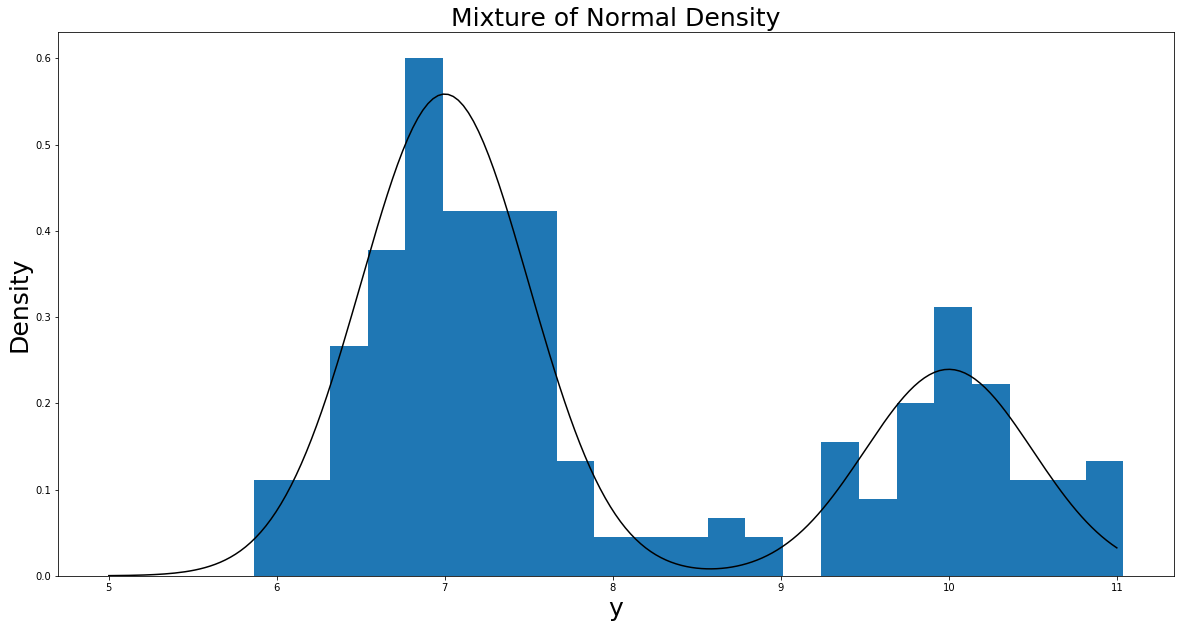

In [3]:
x = np.linspace(5,11,200)
delta = 0.7

plt.figure(figsize=(20,10))
y = delta*norm.pdf(x, 7, 0.5) + (1-delta)*norm.pdf(x, 10, 0.5)
rand_samples = Data_Generator(200)
plt.hist(rand_samples,23,density=True)
plt.plot(x, y, 'k-')
plt.title('Mixture of Normal Density',fontsize=25)
plt.xlabel('y',fontsize=25)
plt.ylabel('Density',fontsize=25)

**(b) Implement an independence chain MCMC procedure to simulate from the posterior
distribution of δ, using your data from part (a).**

In [111]:
class Functions:
    """This function returns function values as well as their derivatives"""
    
    def __init__(self):
        self.f_value = 0
        self.f2_value = 0
        self.g_value = 0
        self.g2_value = 0
        self.R_value = 0
        self.R2_value = 0
    
    def f(self, x):
        self.f_value = np.prod(x*norm.pdf(rand_samples,7,0.5) +(1-x)*norm.pdf(rand_samples,10,0.5))
        return self.f_value
    
    def f2(self, x):
        self.f2_value = np.prod(x*norm.pdf(rand_samples,7,0.5) +(1-x)*norm.pdf(rand_samples,10,0.5))
        return self.f2_value

    def g(self, x):
        self.g_value = uniform.pdf(x)
        return self.g_value

    def g2(self, x):
        self.g2_value = uniform.pdf(x)
        return self.g2_value
    
    def Ratio(self, xt, x):
        self.R_value = self.f(x)*self.g(xt)/(self.f(xt)*self.g(x))
        return self.R_value
    
    def Ratio2(self, xt, x):
        R2_numerator = self.f2(xt)*self.g2(x)
        if R2_numerator==0:
            return 1
        self.R_value = self.f2(x)*self.g2(xt)/(self.f2(xt)*self.g2(x))
        return self.R2_value

Mean estimate of δ: 0.711157870623701


Text(0, 0.5, 'δ')

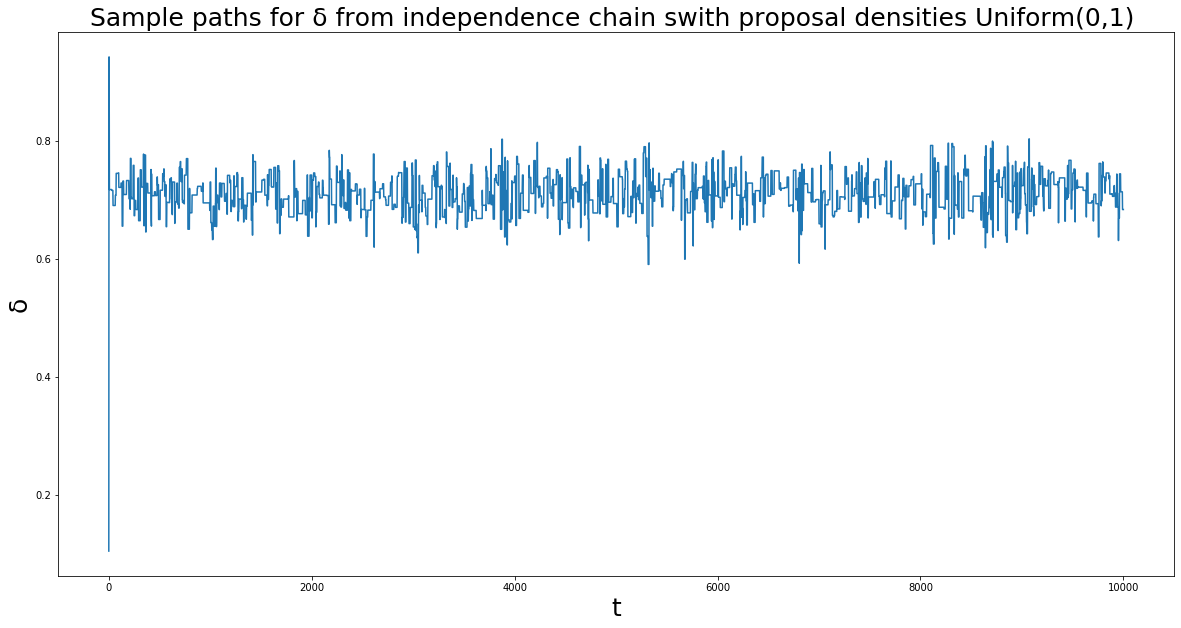

In [135]:
n = 10000
x_space = np.linspace(0, n, n)
x = np.zeros(n)
x[0] = uniform.rvs(0, 1, size=1)
for i in range (0, n-1):
    RVt = x[i]
    RV = uniform.rvs(0, 1, size=1)
    p = min(Functions().Ratio(RVt, RV),1)
    d = binom.rvs(1, p, size=1)
    x[i+1]=RV*d + RVt*(1-d)

print("Mean estimate of δ: {}".format(np.mean(x[100:n])))

plt.figure(figsize=(20, 10))
plt.plot(x_space, x)
plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1) ',fontsize=25)
plt.xlabel('t',fontsize=25)
plt.ylabel('δ',fontsize=25)

**(C)  Implement a random walk chain with δ∗ = δ(t) +  with  ∼Unif(−1,1).**

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


Mean estimate of δ: 0.7137983892029194


Text(0, 0.5, 'δ')

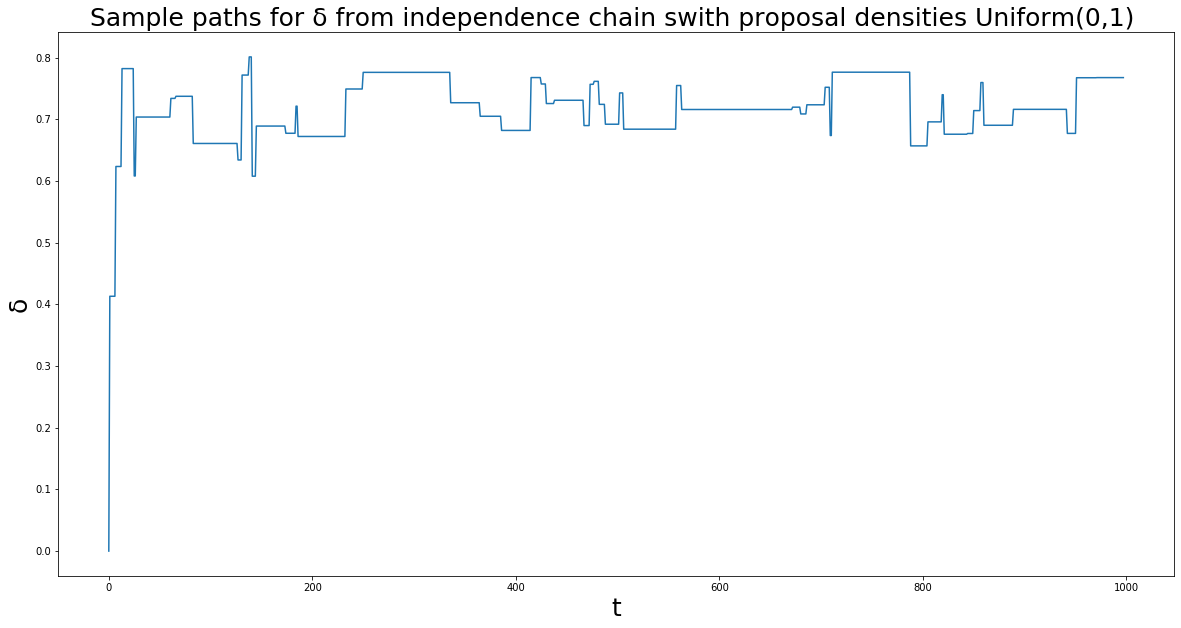

In [123]:
n = 10000
x_space = np.linspace(0, n, n)
x = np.zeros(n)
x[0] = 0
y = 0
U =uniform.rvs(0, 1, size=200)
#Sampling from the mixture
for i in range (200):
    if U[i]<=0.3:
        rand_samples[i]=norm.rvs(10,0.5,size=1)
    else:
        rand_samples[i]=norm.rvs(7,0.5,size=1)

        
for i in range (1, n-2):
    eps = np.random.uniform(-1, 1, 1)
    y = x[i-1] + eps
    if (y < 0) | (y > 1):
        x[i] = x[i-1]
        x[i] = y
    alpha = min(Functions().f2(y)/Functions().f2(x[i-1]), 1)
    u = np.random.uniform(0, 1, 1)
    if u <= alpha:
        x[i] = y
    else:
        x[i] = x[i-1]
        
print("Mean estimate of δ: {}".format(np.mean(x[100:n])))

plt.figure(figsize=(20, 10))
plt.plot(x_space[0:998], x[0:998])
plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1) ',fontsize=25)
plt.xlabel('t',fontsize=25)
plt.ylabel('δ',fontsize=25)

**(d) Reparameterize the problem letting U = log{δ/(1 − δ)} and U∗ = u(t) + . Implement a random walk chain in U-space as in Equation (7.8).**

Mean estimate of δ: 0.7102387776224061


Text(0, 0.5, 'δ')

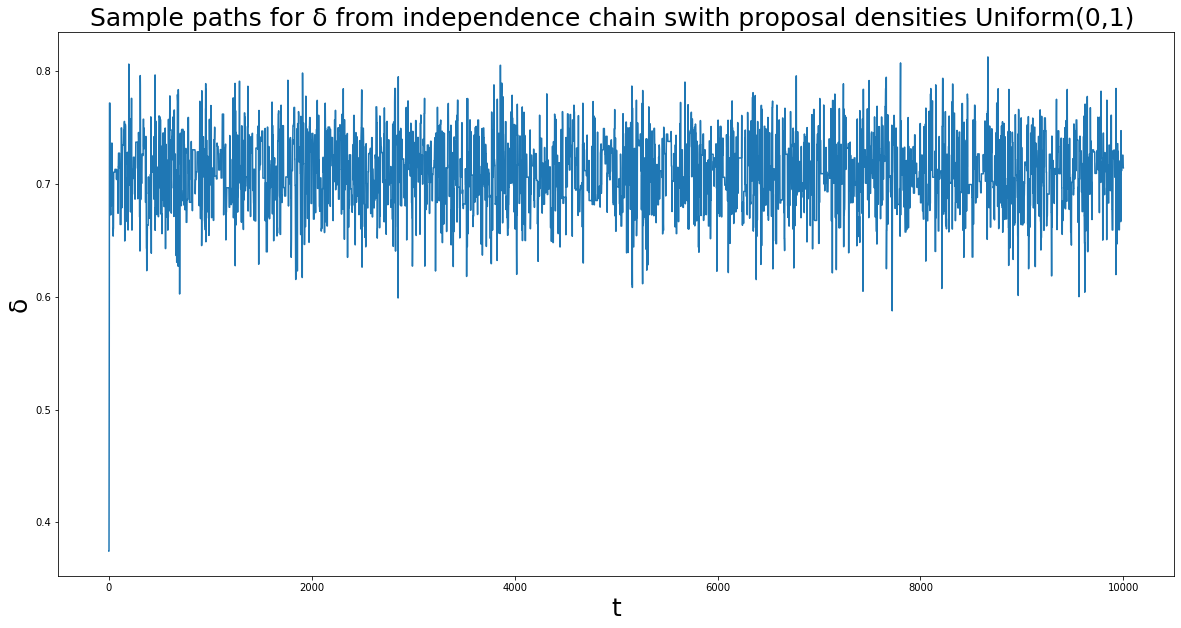

In [125]:
n = 10000
x_space = np.linspace(0, n, n)
u = np.zeros(n)
u[0] = np.random.uniform(-1, 1,1)
p = np.zeros(n)
p[0] = np.exp(u[0])/(1+np.exp(u[0]))

for i in range (0,n-1):
    u[i+1] = u[i] + np.random.uniform(-1, 1,1)
    p[i+1] = np.exp(u[i+1])/(1+np.exp(u[i+1]))
    R = np.exp(np.log(Functions().f(p[i+1])) - np.log(Functions().f(p[i]))) * np.exp(u[i])/np.exp(u[i+1])
    if (R<1):
        if(binom.rvs(1, R, size=1)==0):
            p[i+1] = p[i]
            u[i+1] = u[i]
            

print("Mean estimate of δ: {}".format(np.mean(p[100:n])))

plt.figure(figsize=(20, 10))
plt.plot(x_space, p)
plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1) ', fontsize=25)
plt.xlabel('t',fontsize=25)
plt.ylabel('δ',fontsize=25)

**(e) Compare the estimates and convergence behavior of the three algorithms.**

| Algorithem | Mean estimate of δ | Acceptance Ratio |
| --- |  --- |  --- |
|     Independence Chains       |      0.711158     |     0.0954       | 
|     Random Walk Chains      |     0.7137984      |      0.0425      |
|      Reprameterized Random Walk Chains      |     0.710239      |      0.7383      |

Acccording to the table above and the obtained results, the mean estimate of δ for all three are close. However, if we look at the acceptance ratios we can see that both Independence Chains and Random Walk Chains have a vey low acceptance ratio (less than 10%), while Reprameterized Random Walk Chains has 74% acceptance rate and is substationally improved. All three algorithems converge and fluctuate in the region supported by f.

**4. (20 Points) Problem 7.2 on page 231 of Computational Statistics.**

**Simulating from the mixture distribution in Equation (7.6) is straightforward [see
part (a) of Problem 7.1]. However, using the Metropolis–Hastings algorithm to simulate realizations from this distribution is useful for exploring the role of the proposal
distribution.**

**(a) Implement a Metropolis–Hastings algorithm to simulate from Equation (7.6) with
δ = 0.7, using N(x(t), 0.012) as the proposal distribution. For each of three starting
values, x(0) = 0, 7, and 15, run the chain for 10,000 iterations. Plot the sample path
of the output from each chain. If only one of the sample paths was available, what
would you conclude about the chain? For each of the simulations, create a histogram
of the realizations with the true density superimposed on the histogram. Based on
your output from all three chains, what can you say about the behavior of the chain?**

In [126]:
def ratio(x,y):
    a = min( 1, (.7*norm.pdf(y,7,.5)+.3*norm.pdf(y,10,.5))/(.7*norm.pdf(x,7,.5)+.3*norm.pdf(x,10,.5))) 
    return a

def metro_hast(x0, n, Range):
    es = np.zeros(n)
    x=x0
    x_space = np.linspace(0,10000,10000)
    x_space2 = np.linspace(Range[0],Range[1],200)
    delta=0.7
    y_space = delta * norm.pdf(x_space2,7,0.5) + (1-delta) * norm.pdf(x_space2,10,0.5)
    
    for k in range (0,n):
        u=uniform.rvs(0,1,1)
        y=norm.rvs(x,0.01,1)
        if u < ratio(x,y):
            x = y
        else:
            x = x0
        es[k] = x
    
    print("Mean estimate of δ: {}".format(np.mean(es[100:n])))
    plt.figure(figsize=(20,10))
    plt.plot(x_space, es)
    plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1)', fontsize=25)
    plt.xlabel('t', fontsize=25)
    plt.ylabel('δ', fontsize=25)
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.hist(es, 40, density=True, histtype='bar', label='Sample')
    plt.plot(x_space2, y_space, 'r-', label='True PDF')
    plt.legend(prop={'size': 25})
    plt.title('Mixture of Normal Density', fontsize=25)
    plt.xlabel('y', fontsize=25)
    plt.ylabel('Density', fontsize=25)
    plt.show()
    
    return es

`Considering starting value of 0`

Mean estimate of δ: 0.01190637738976776


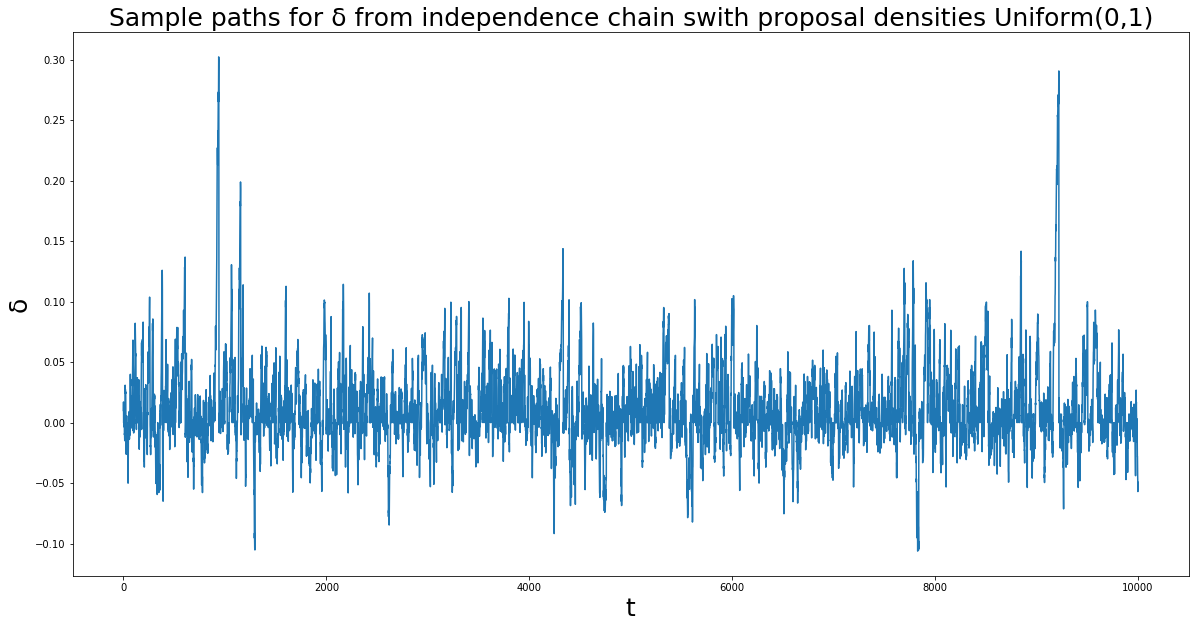

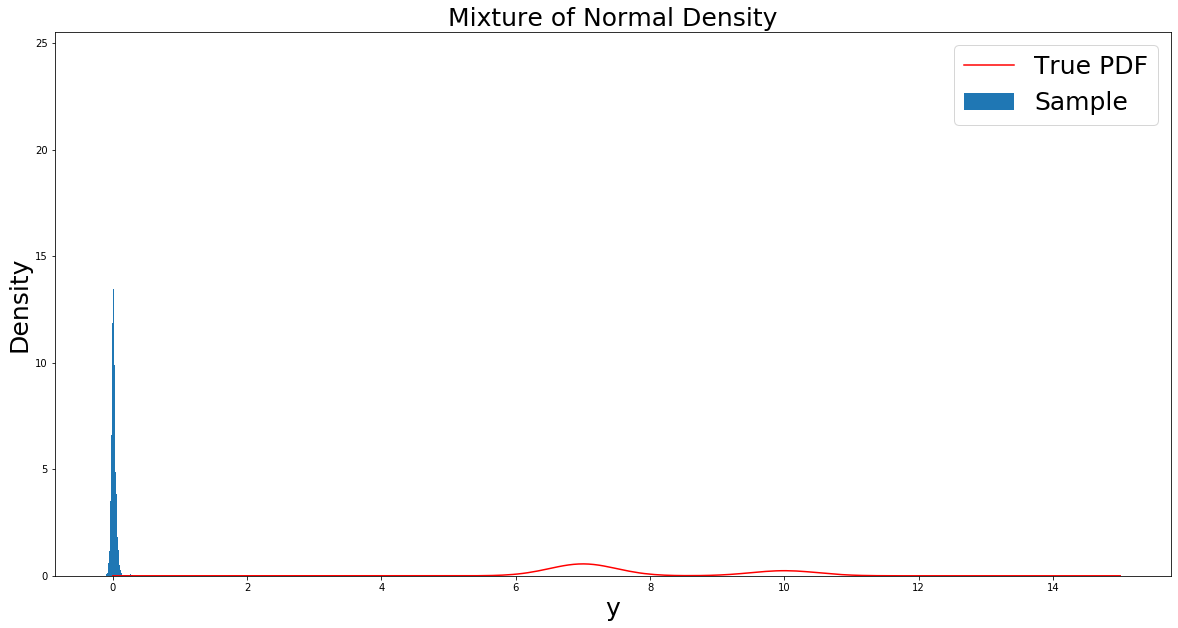

array([ 0.01005852,  0.01707851,  0.        , ..., -0.0477042 ,
       -0.05700365, -0.04934384])

In [127]:
metro_hast(0,10000,[0,15])

`Considering starting value of 7`

Mean estimate of δ: 7.070270781014271


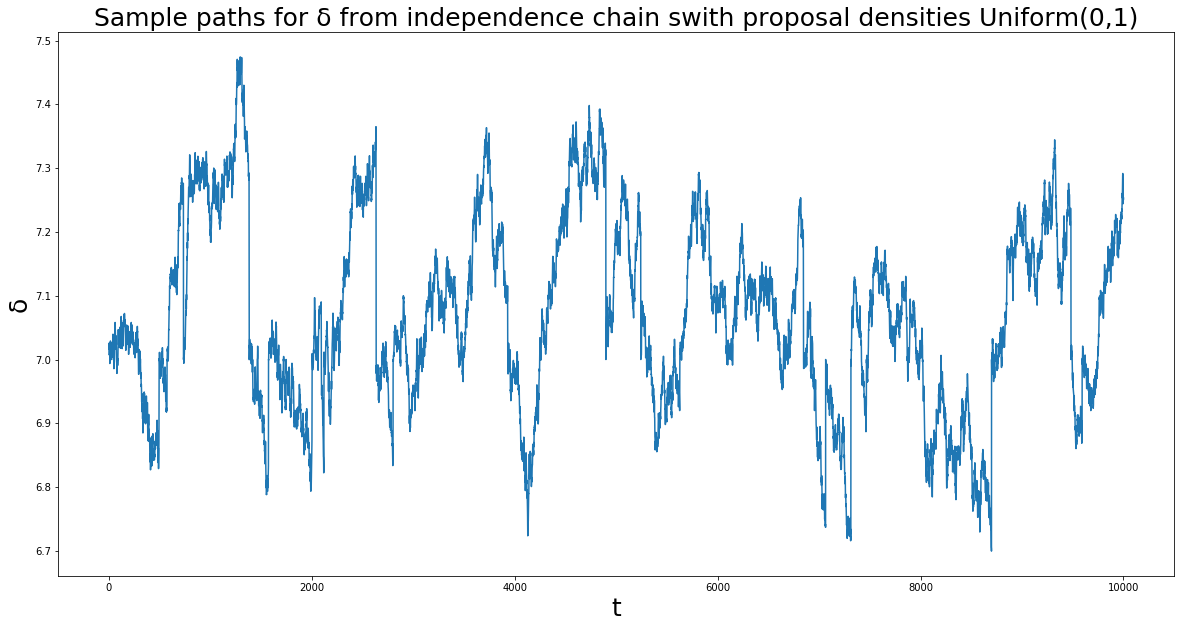

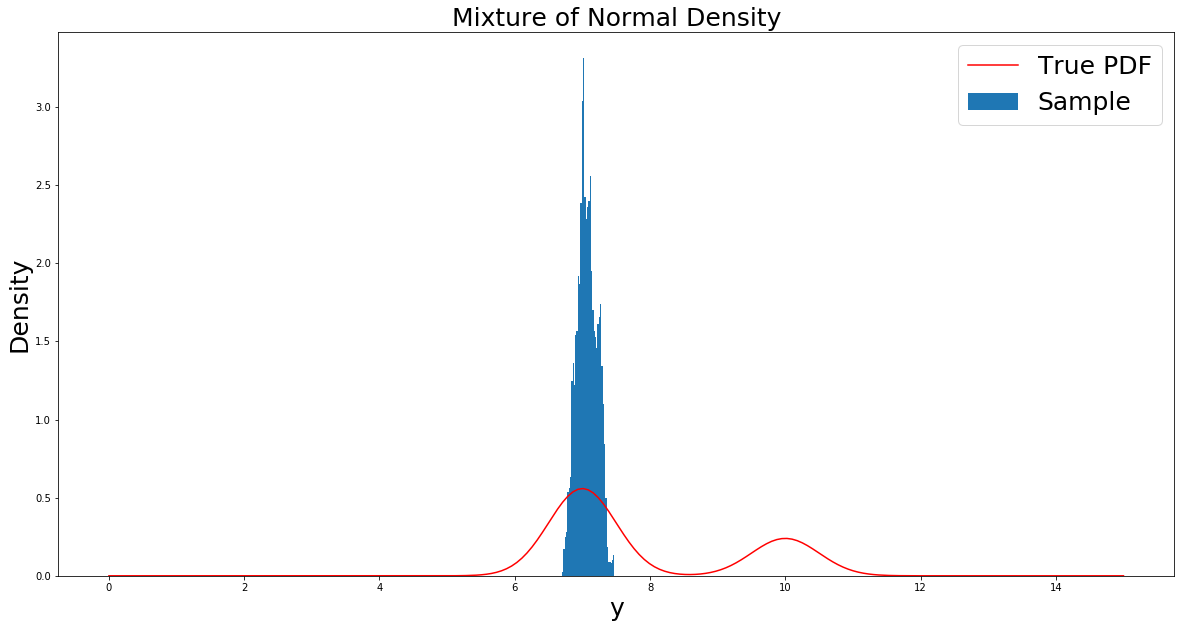

array([7.00791932, 7.0101299 , 7.02479107, ..., 7.25303121, 7.2543922 ,
       7.25167352])

In [128]:
metro_hast(7,10000,[0,15])

`Considering starting value of 15`

Mean estimate of δ: 14.989307878587079


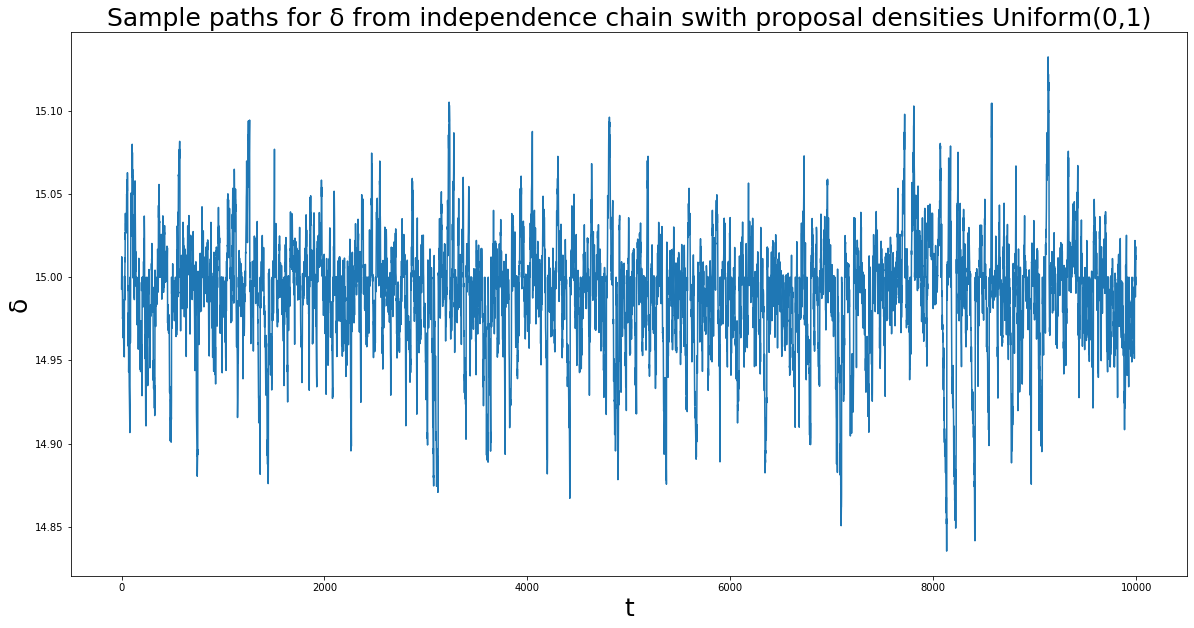

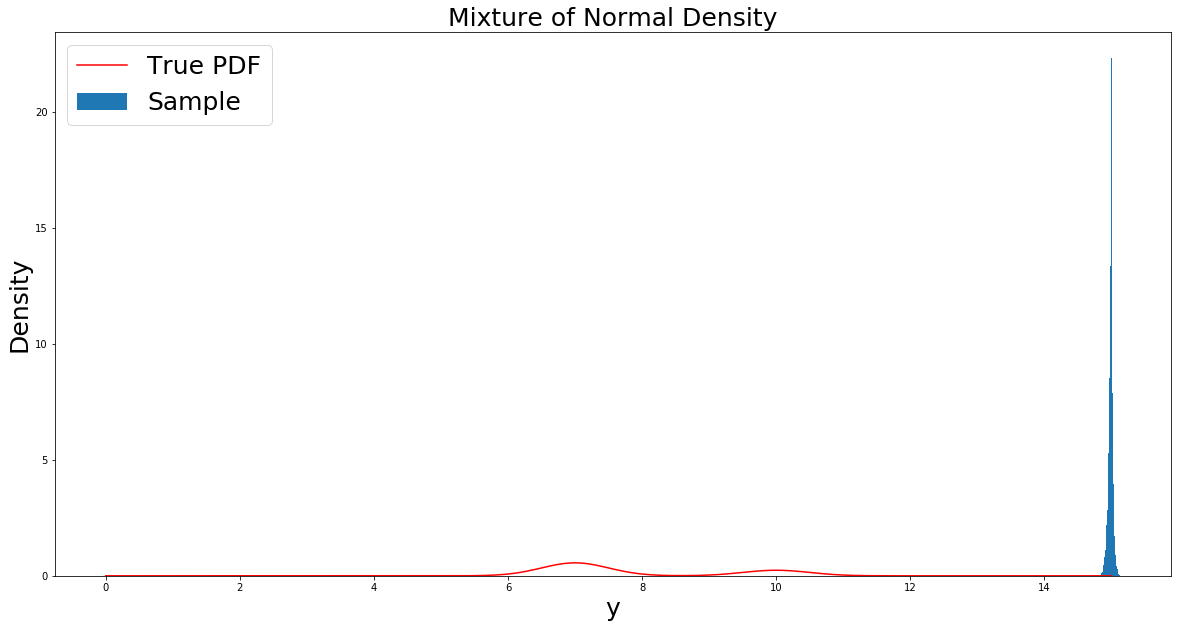

array([14.99302086, 14.99959443, 15.01224722, ..., 15.01079396,
       15.01409642, 15.01798604])

In [129]:
metro_hast(15,10000,[0,15])

`N(0,0.01^2)`: Using the mean of zero results in chains moving slowly from zero and moving towards 7 and 11.

`N(7,0.01^2)`: Using the mean of 7 results in chains moving around 7 itself and not bending in any way.

`N(15,0.01^2)`: Using the mean of 15 results in chains moving towards 10 and stabilizing to some value closer to 10.

Due to the very small standard deviation chosen we can see that chains take very small steps at each itteration to get closer to the actual mean.

**(b) Now change the proposal distribution to improve the convergence properties of the
chain. Using the new proposal distribution, repeat part (a).**

lets try normal distribution with higher varaince N(7,0.2)

In [131]:
def metro_hast2(x0, n, Range):
    es = np.zeros(n)
    x=x0
    x_space = np.linspace(0,10000,10000)
    x_space2 = np.linspace(Range[0],Range[1],200)
    delta=0.7
    y_space = delta * norm.pdf(x_space2,7,0.5) + (1-delta) * norm.pdf(x_space2,10,0.5)
    
    for k in range (0,n):
        u=uniform.rvs(0,1,1)
        y=norm.rvs(x,0.2,1)
        if u < ratio(x,y):
            x = y
        else:
            x = x0
        es[k] = x
    
    print("Mean estimate of δ: {}".format(np.mean(es[100:n])))
    plt.figure(figsize=(20,10))
    plt.plot(x_space, es)
    plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1)', fontsize=25)
    plt.xlabel('t', fontsize=25)
    plt.ylabel('δ', fontsize=25)
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.hist(es, 40, density=True, histtype='bar', label='Sample')
    plt.plot(x_space2, y_space, 'r-', label='True PDF')
    plt.legend(prop={'size': 25})
    plt.title('Mixture of Normal Density', fontsize=25)
    plt.xlabel('y', fontsize=25)
    plt.ylabel('Density', fontsize=25)
    plt.show()
    
    return es

Mean estimate of δ: 7.005999122234721


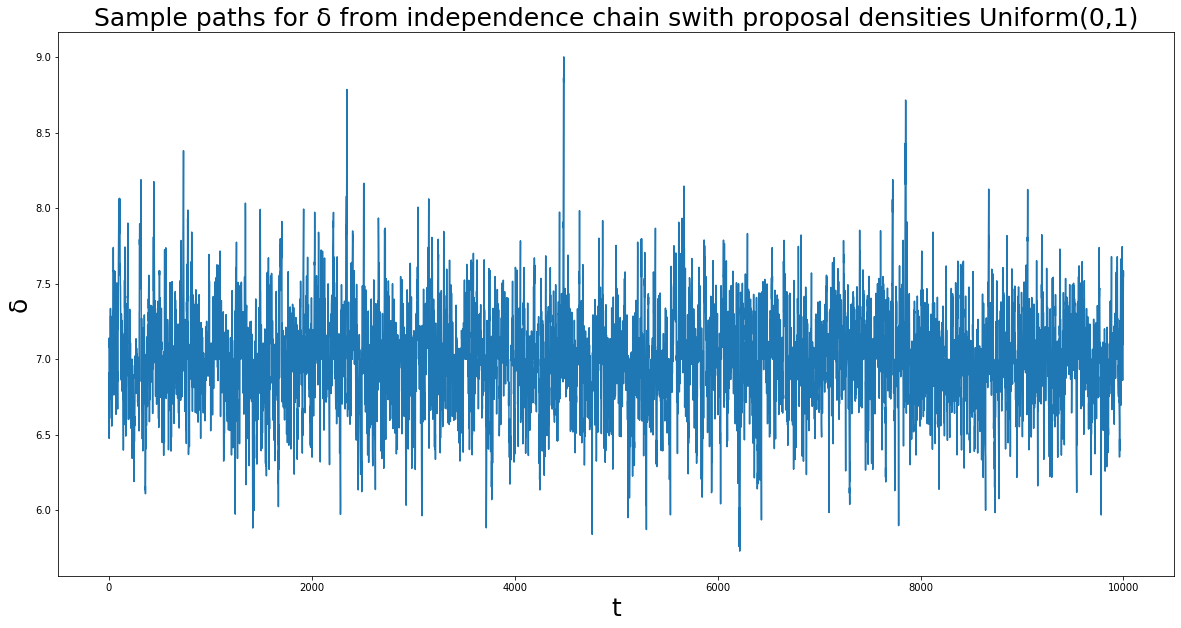

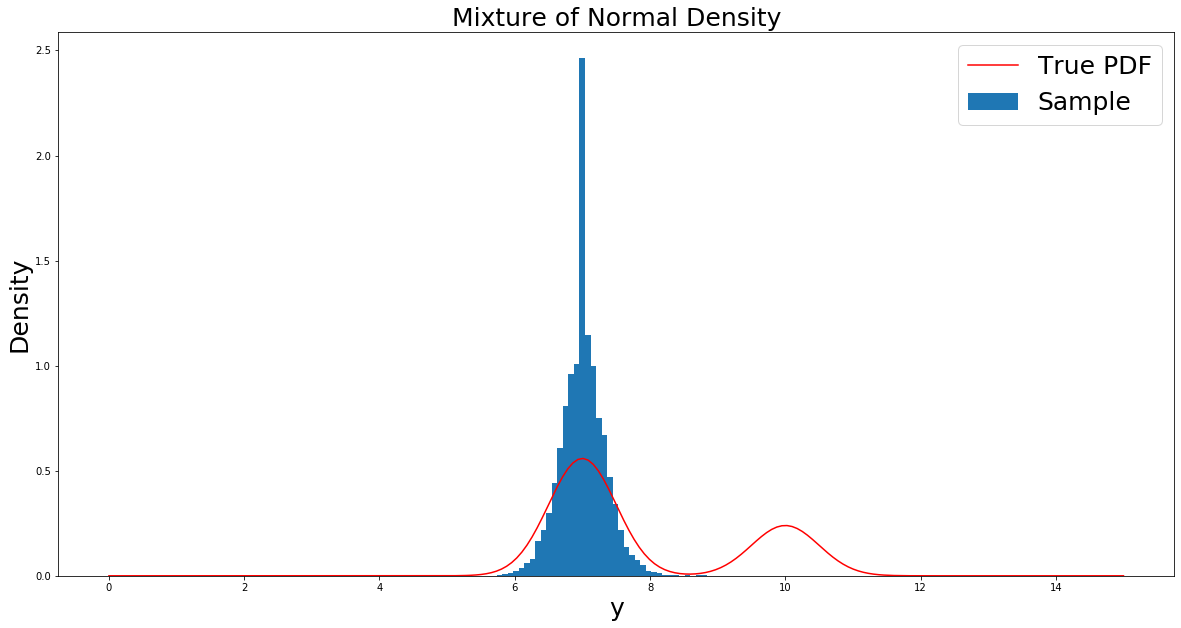

array([7.08373583, 7.13967362, 6.86093086, ..., 7.36063866, 7.58549798,
       7.55166434])

In [132]:
metro_hast2(7,10000,[0,15])

**lets try double gamma random variable**

In [133]:
def metro_hast3(x0, n, Range):
    es = np.zeros(n)
    x=x0
    x_space = np.linspace(0,10000,10000)
    x_space2 = np.linspace(Range[0],Range[1],200)
    delta=0.7
    y_space = delta * norm.pdf(x_space2,7,0.5) + (1-delta) * norm.pdf(x_space2,10,0.5)
    
    for k in range (0,n):
        u=uniform.rvs(0,1,1)
        y=dgamma.rvs(1.5, loc=x0, scale=1.1, size=1)
        if u < ratio(x,y):
            x = y
        else:
            x = x0
        es[k] = x
    
    print("Mean estimate of δ: {}".format(np.mean(es[100:n])))
    plt.figure(figsize=(20,10))
    plt.plot(x_space, es)
    plt.title('Sample paths for δ from independence chain swith proposal densities Uniform(0,1)', fontsize=25)
    plt.xlabel('t', fontsize=25)
    plt.ylabel('δ', fontsize=25)
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.hist(es, 40, density=True, histtype='bar', label='Sample')
    plt.plot(x_space2, y_space, 'r-', label='True PDF')
    plt.legend(prop={'size': 25})
    plt.title('Mixture of Normal Density', fontsize=25)
    plt.xlabel('y', fontsize=25)
    plt.ylabel('Density', fontsize=25)
    plt.show()
    
    return es

`Considering starting value of 7`

Mean estimate of δ: 7.111154346014208


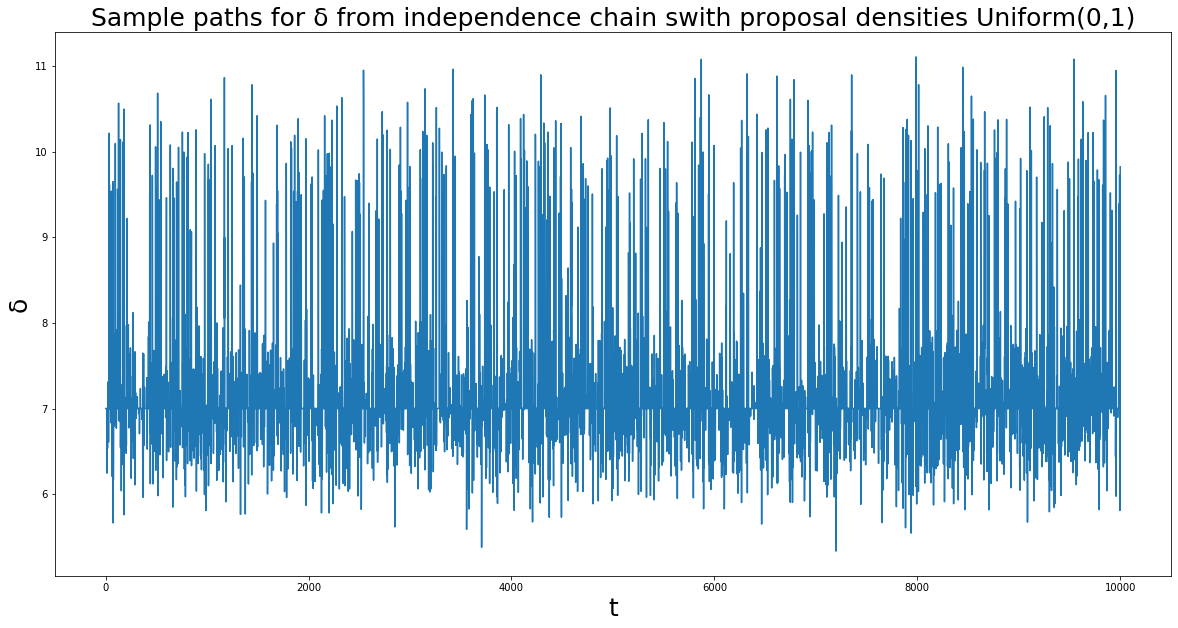

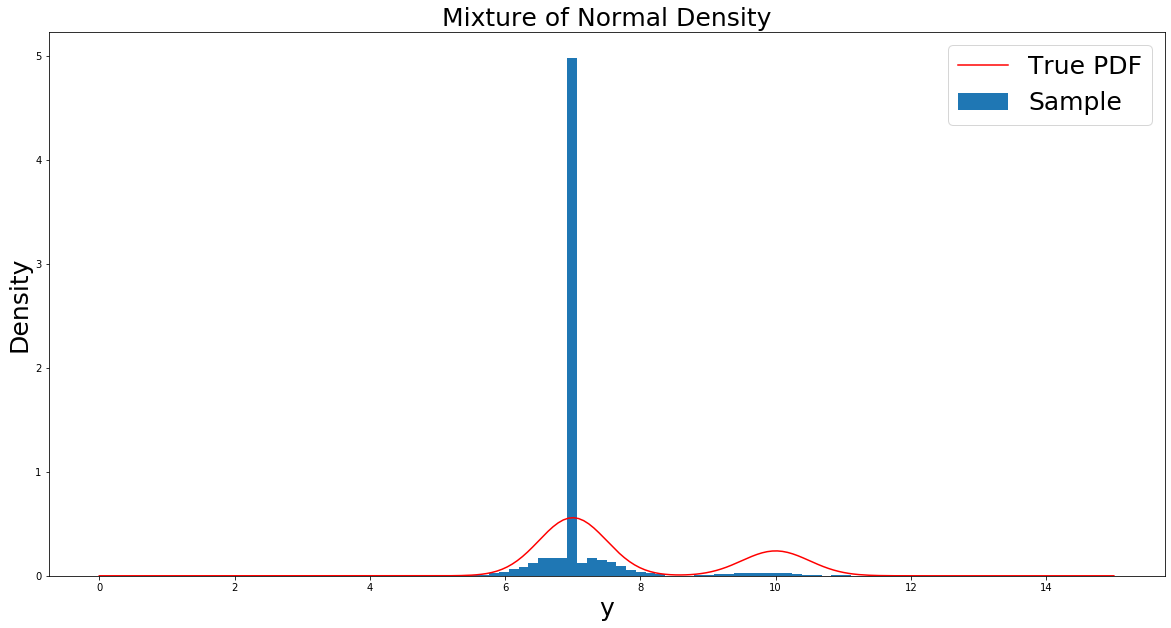

array([7.        , 7.        , 7.        , ..., 7.92939312, 8.08406876,
       9.82647253])

In [134]:
metro_hast3(7,10000,[0,15])

`Considering starting value of 0`

Mean estimate of δ: 0.729684653166961


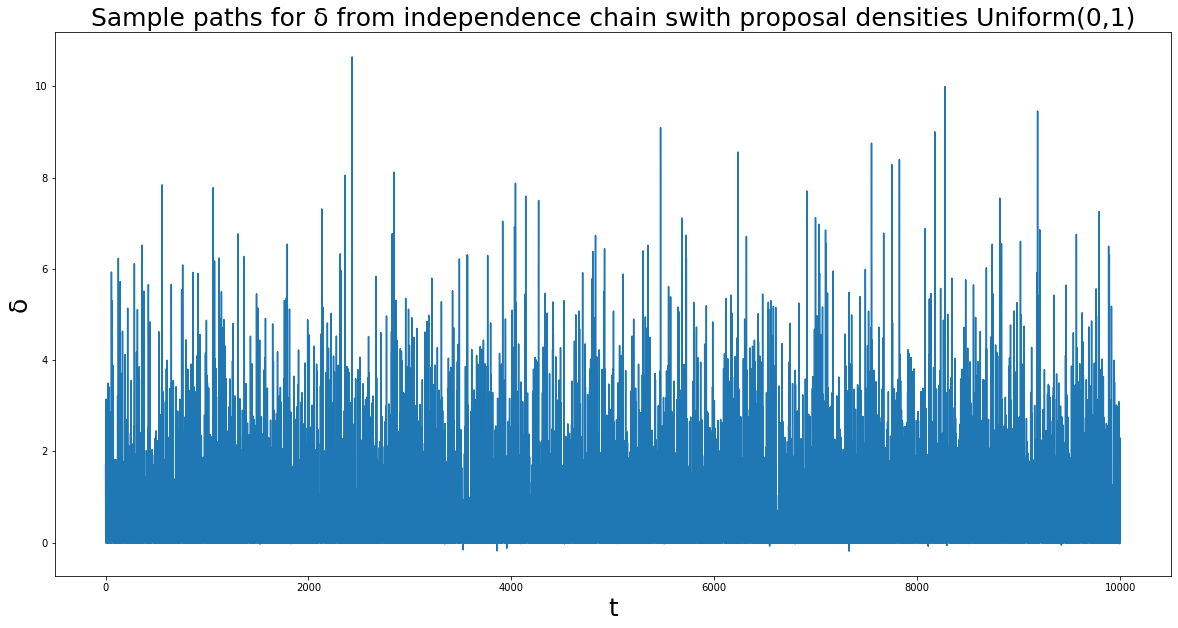

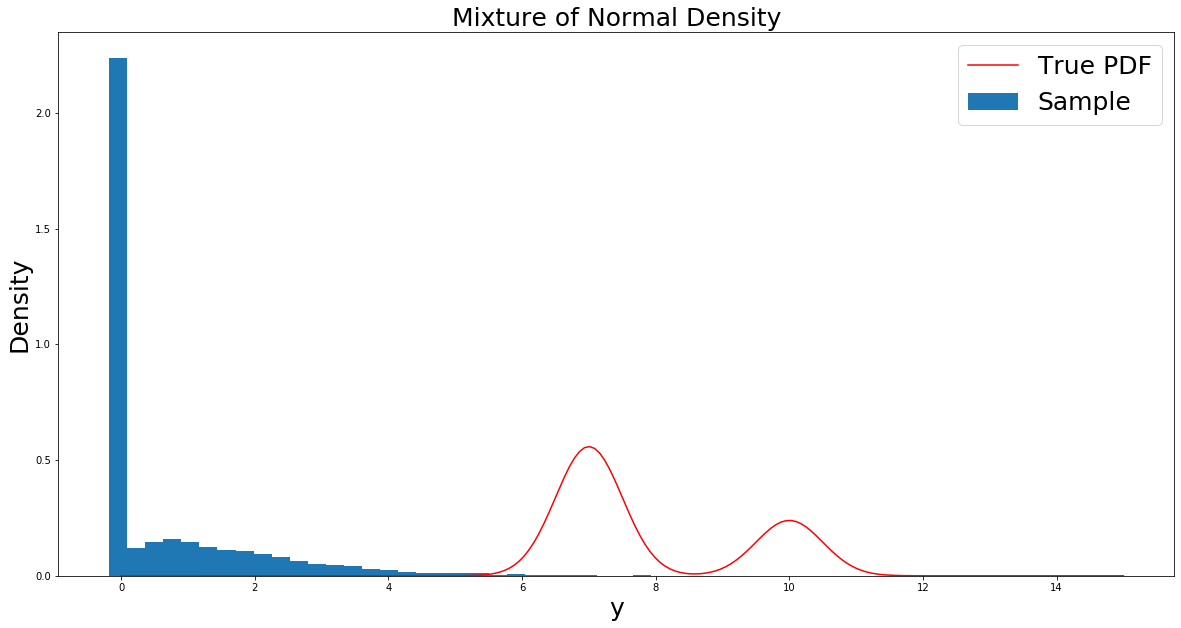

array([1.70359852, 0.        , 0.        , ..., 2.29755602, 0.        ,
       0.76573844])

In [137]:
metro_hast3(0,10000,[0,15])

`Considering starting value of 15`

Mean estimate of δ: 14.278240290916482


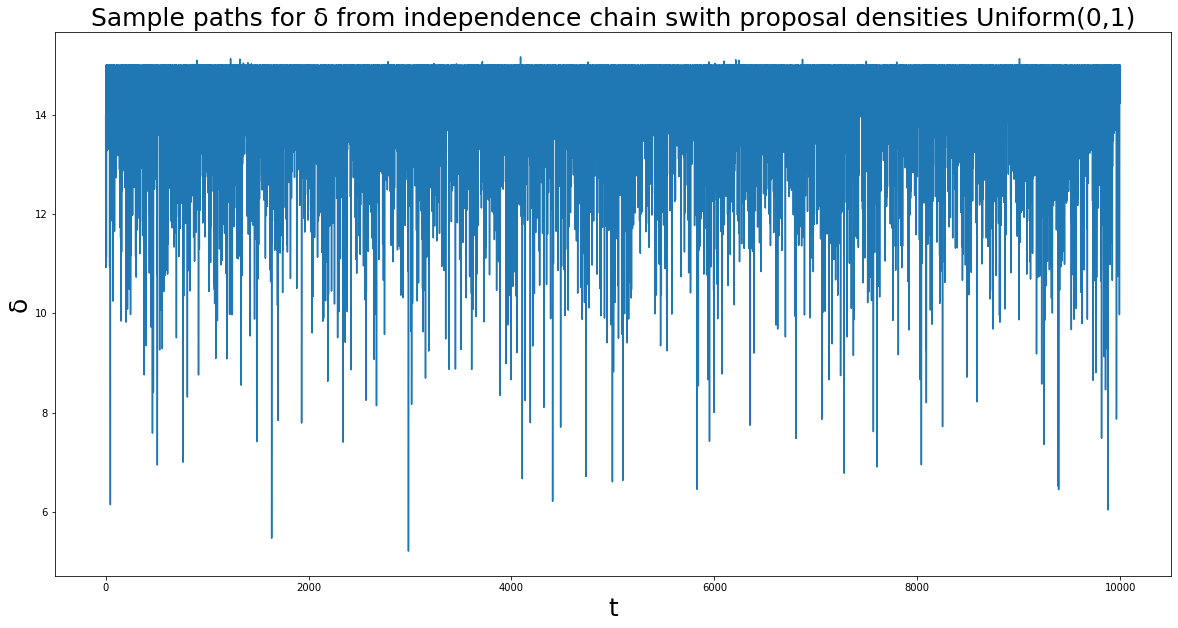

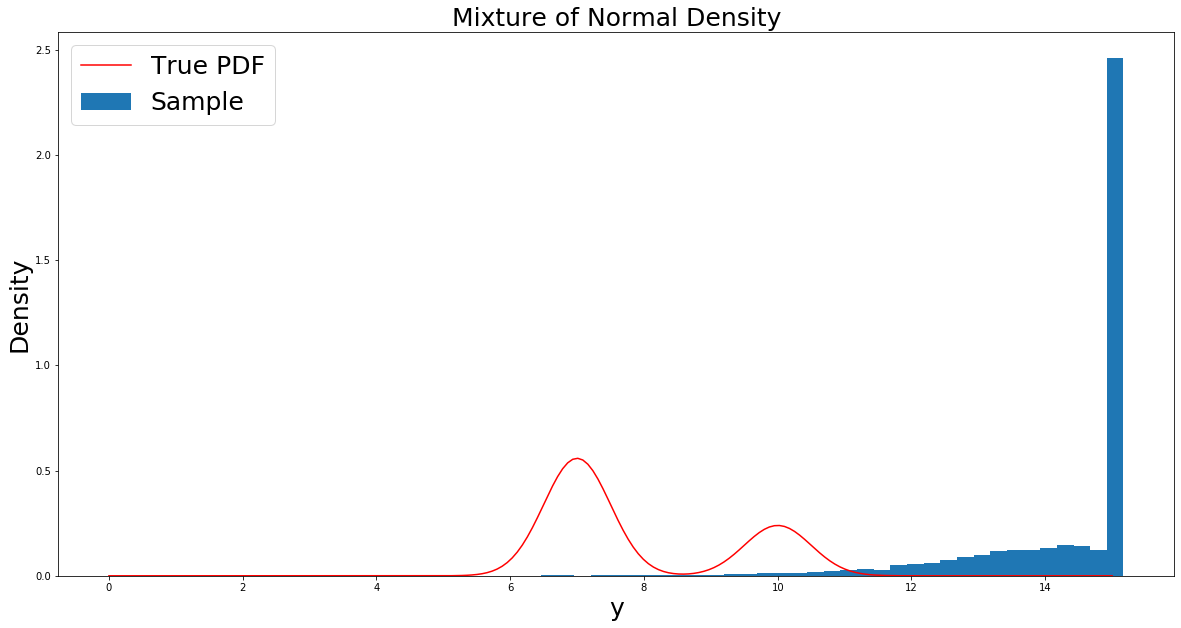

array([13.99234609, 10.92415237, 15.        , ..., 15.        ,
       14.23199286, 15.        ])

In [138]:
metro_hast3(15,10000,[0,15])

**In all three cases compared to part a it can be seen that the new proposal distribution does much better job of finding the true means in cases where the mean of distribution is off the new proposel adjust much better moves much closer to the actual mean.**